Big Data Mart Sales Problem Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

bigdatamart_Train.csv: Use this file for the model building purpose.

bigdatamart_Test.csv: Use this file for getting predictions from the trained model

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [72]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [73]:
df.shape

(8523, 12)

In [74]:
#the data has lot of objects and nan value
#it is a regression problem
#We need to predict the sale from the test data given.

In [75]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [76]:
df2=lab_enc.fit_transform(df['Item_Identifier'])

In [77]:
df['Item_Identifier']=df2

In [78]:
df3=lab_enc.fit_transform(df['Item_Type'])

In [79]:
df['Item_Type']=df2

In [80]:
df4=lab_enc.fit_transform(df['Item_Fat_Content'])
df5=lab_enc.fit_transform(df['Outlet_Establishment_Year'])
df6=lab_enc.fit_transform(df['Outlet_Identifier'])
df7=lab_enc.fit_transform(df['Outlet_Size'])
df8=lab_enc.fit_transform(df['Outlet_Location_Type'])
df9=lab_enc.fit_transform(df['Outlet_Type'])

In [81]:
df['Outlet_Establishment_Year']=df5
df['Item_Fat_Content']=df4
df['Outlet_Identifier']=df6
df['Outlet_Size']=df7
df['Outlet_Location_Type']=df8
df['Outlet_Type']=df9
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,156,249.8092,9,4,1,0,1,3735.1380
1,8,5.920,2,0.019278,8,48.2692,3,8,1,2,2,443.4228
2,662,17.500,1,0.016760,662,141.6180,9,4,1,0,1,2097.2700
3,1121,19.200,2,0.000000,1121,182.0950,0,3,3,2,0,732.3800
4,1297,8.930,1,0.000000,1297,53.8614,1,1,0,2,1,994.7052
5,758,10.395,2,0.000000,758,51.4008,3,8,1,2,2,556.6088
6,696,13.650,2,0.012741,696,57.6588,1,1,0,2,1,343.5528
7,738,NaN,1,0.127470,738,107.7622,5,0,1,2,3,4022.7636
8,440,16.200,2,0.016687,440,96.9726,7,5,3,1,1,1076.5986
9,990,19.200,2,0.094450,990,187.8214,2,7,3,1,1,4710.5350


In [82]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [84]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mode()[0])

In [85]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,156,249.8092,9,4,1,0,1,3735.1380
1,8,5.920,2,0.019278,8,48.2692,3,8,1,2,2,443.4228
2,662,17.500,1,0.016760,662,141.6180,9,4,1,0,1,2097.2700
3,1121,19.200,2,0.000000,1121,182.0950,0,3,3,2,0,732.3800
4,1297,8.930,1,0.000000,1297,53.8614,1,1,0,2,1,994.7052
5,758,10.395,2,0.000000,758,51.4008,3,8,1,2,2,556.6088
6,696,13.650,2,0.012741,696,57.6588,1,1,0,2,1,343.5528
7,738,12.150,1,0.127470,738,107.7622,5,0,1,2,3,4022.7636
8,440,16.200,2,0.016687,440,96.9726,7,5,3,1,1,1076.5986
9,990,19.200,2,0.094450,990,187.8214,2,7,3,1,1,4710.5350


In [86]:
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [18]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [26]:
x1=df.drop(columns=['Item_Outlet_Sales'])
y1=df['Item_Outlet_Sales']

In [19]:
df4=lab_enc.fit_transform(df_test['Item_Fat_Content'])
df5=lab_enc.fit_transform(df_test['Outlet_Establishment_Year'])
df3=lab_enc.fit_transform(df_test['Item_Type'])
df7=lab_enc.fit_transform(df_test['Outlet_Size'])
df8=lab_enc.fit_transform(df_test['Outlet_Location_Type'])
df9=lab_enc.fit_transform(df_test['Outlet_Type'])
df2=lab_enc.fit_transform(df_test['Item_Identifier'])
df6=lab_enc.fit_transform(df_test['Outlet_Identifier'])

In [20]:
df_test['Item_Type']=df3
df_test['Outlet_Establishment_Year']=df5
df_test['Item_Fat_Content']=df4
df_test['Outlet_Size']=df7
df_test['Outlet_Location_Type']=df8
df_test['Outlet_Type']=df9
df_test['Item_Identifier']=df2
df_test['Outlet_Identifier']=df6

In [21]:
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,4,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,7,3,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,3,3,2,0
3,809,7.315,1,0.015388,13,155.0340,2,7,3,1,1
4,1184,NaN,2,0.118599,4,234.2300,5,0,1,2,3
5,461,9.800,2,0.063817,6,117.1492,8,2,2,0,1
6,604,19.350,2,0.082602,0,50.1034,3,8,1,2,2
7,266,NaN,1,0.015782,0,81.0592,5,0,1,2,3
8,668,6.305,2,0.123365,13,95.7436,7,5,3,1,1
9,170,5.985,1,0.005698,0,186.8924,2,7,3,1,1


In [22]:
df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mode()[0])

In [87]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.736176,1.369354,0.066132,779.714889,140.992782,4.722281,3.790684,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.234540,0.644810,0.051598,449.222377,62.275067,2.837201,2.730322,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,395.500000,93.826500,2.000000,1.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.150000,1.000000,0.053931,783.000000,143.012800,5.000000,4.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,1167.000000,185.643700,7.000000,6.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,1558.000000,266.888400,9.000000,8.000000,3.000000,2.000000,3.000000,13086.964800


In [88]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.043638,-0.098114,-0.025482,1.000000,0.012853,-0.008602,-0.014288,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.043638,1.000000,-0.017103,-0.017843,0.043638,0.025258,-0.007118,0.032357,-0.004176,-0.001756,-0.026358,0.006443
Item_Fat_Content,-0.098114,-0.017103,1.000000,0.034042,-0.098114,-0.000876,-0.002357,0.001595,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.017843,0.034042,1.000000,-0.025482,-0.001315,-0.100439,-0.082927,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,1.000000,0.043638,-0.098114,-0.025482,1.000000,0.012853,-0.008602,-0.014288,0.000855,0.003656,-0.001178,0.002869
Item_MRP,0.012853,0.025258,-0.000876,-0.001315,0.012853,1.000000,0.003319,0.004162,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007118,-0.002357,-0.100439,-0.008602,0.003319,1.000000,-0.030969,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.014288,0.032357,0.001595,-0.082927,-0.014288,0.004162,-0.030969,1.000000,0.360690,0.042005,-0.040040,-0.025525
Outlet_Size,0.000855,-0.004176,-0.004795,0.087796,0.000855,-0.002473,0.053224,0.360690,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,-0.001756,-0.004102,-0.028099,0.003656,0.000232,-0.716176,0.042005,-0.290216,1.000000,0.467219,0.089367


<AxesSubplot:>

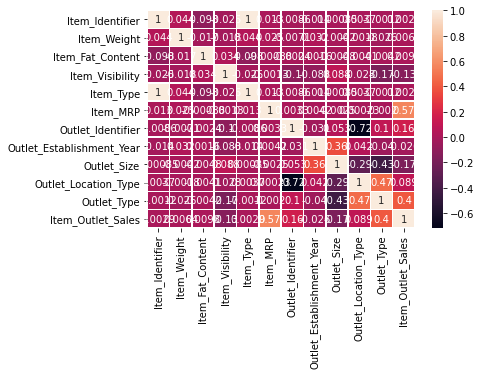

In [89]:
sns.heatmap(df.corr(),annot=True, linewidth=0.5)

In [35]:
##item type and item identifier are corelated , so we can drop any one of them.
##outlet identifier and outlet location are strongly corelated.
##since these pairs have same correlation, we will keep either of them

In [90]:
df=df.drop(columns=('Item_Identifier'))
df=df.drop(columns=('Outlet_Identifier'))

In [91]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:>

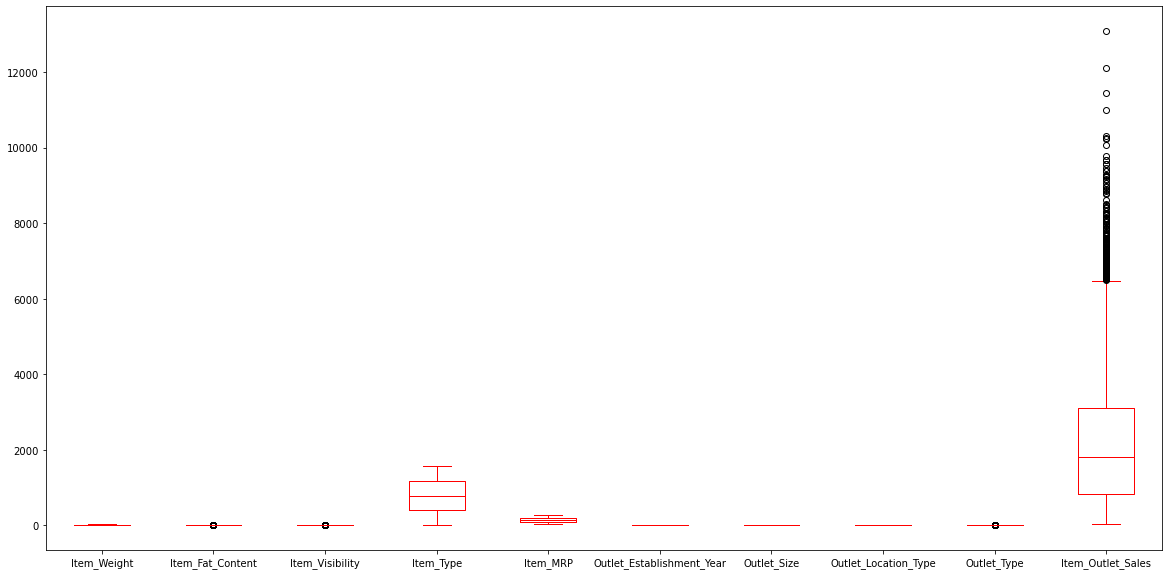

In [92]:
df.plot(kind='box', figsize=(20,10), color='r')

In [93]:
x=df.drop(columns=['Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

<AxesSubplot:>

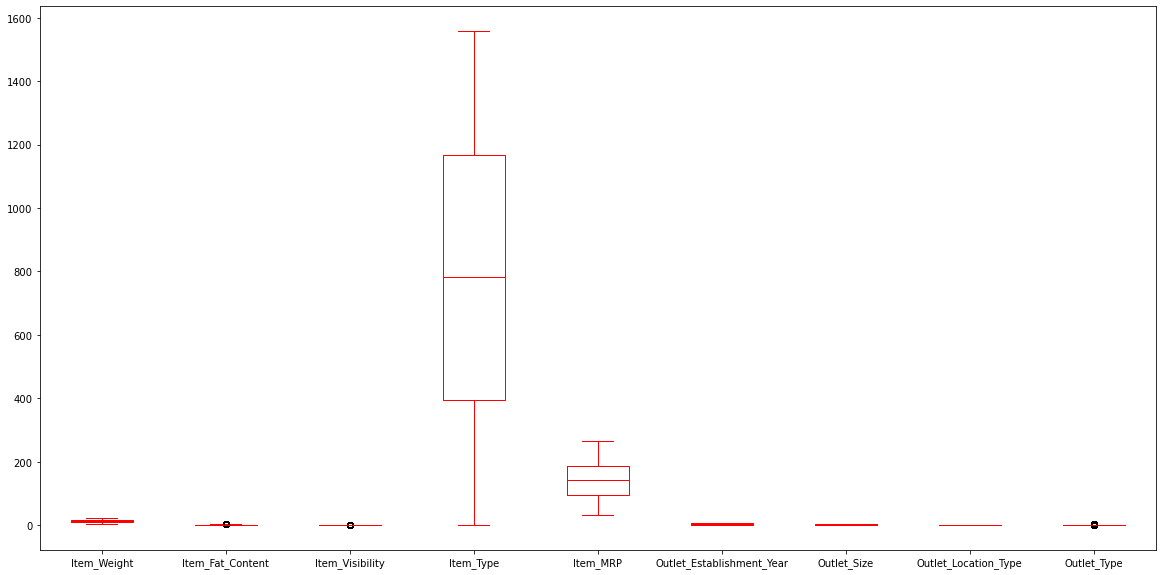

In [94]:
x.plot(kind='box', figsize=(20,10), color='r')

In [54]:
##negligiable outliers can be seen in fat content, item visibility and outlet type

In [95]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-0.81151126, -0.57284357, -0.97073217, ..., -0.74445778,
        -1.36933384, -0.25265831],
       [-1.60975569,  0.97809218, -0.90811123, ..., -0.74445778,
         1.09156913,  1.00297245],
       [ 1.12505806, -0.57284357, -0.95691733, ..., -0.74445778,
        -1.36933384, -0.25265831],
       ...,
       [-0.50449417, -0.57284357, -0.59978449, ...,  0.26653866,
        -0.13888236, -0.25265831],
       [-1.30510027,  0.97809218,  1.53287976, ..., -0.74445778,
         1.09156913,  1.00297245],
       [ 0.48740719, -0.57284357, -0.41193591, ...,  0.26653866,
        -1.36933384, -0.25265831]])

In [96]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.005748,Item_Weight
1,1.011036,Item_Fat_Content
2,1.051072,Item_Visibility
3,1.012600,Item_Type
4,1.000816,Item_MRP
5,1.206943,Outlet_Establishment_Year
6,1.478599,Outlet_Size
7,1.322235,Outlet_Location_Type
8,1.506025,Outlet_Type


In [58]:
##no collinearity found

In [97]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y,test_size=0.25, random_state=323)

In [98]:
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [99]:
regression.score(x_train,y_train)

0.5099480585448624

In [100]:
regression.score(x_test,y_test)

0.46859701477813553

In [103]:
y_pred=regression.predict(x_test)
y_pred.mean()

2222.392338939791

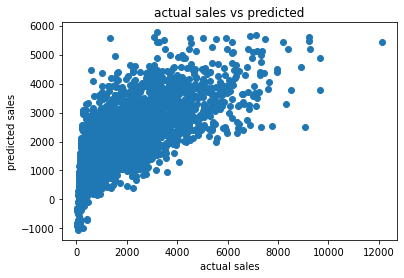

In [104]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()

In [105]:
from sklearn.model_selection import KFold, cross_val_score

In [106]:
score=cross_val_score(regression,x,y,cv=5)
score.mean()

0.4978864839704453

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
knn= KNeighborsRegressor()

In [109]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [111]:
y_pred= knn.predict(x_test)
y_pred

array([2263.32052, 1808.3128 , 2901.29008, ...,  631.57788, 1853.98668,
       2196.87368])

In [112]:
knn.score(x_train,y_train)

0.6931613547008364

In [113]:
knn.score(x_test, y_test)

0.48543121906860587

In [114]:
score=cross_val_score(knn,x,y,cv=5)
score.mean()

0.17236991160692972

In [116]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train, y_train)

In [117]:
clf.score(x_train, y_train)

1.0

In [118]:
clf.score(x_test, y_test)

0.13613198142600624

In [119]:
y_pred= clf.predict(x_test)
y_pred

array([ 516.6608, 1323.6104, 5954.2494, ...,  247.0118,  810.9444,
       3968.168 ])

In [120]:
score=cross_val_score(clf,x,y,cv=5)
score.mean()

0.16679798793297498

In [138]:
##Linear Regression giving better result
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [140]:
ridge = Ridge(alpha=1).fit(x_train, y_train)

In [151]:
ridge = Ridge(alpha=1).fit(x_test, y_test)

In [141]:
score=cross_val_score(ridge,x,y,cv=5)
score.mean()

0.4978870221624369

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [142]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.50616353735687
Best Params:  {'alpha': 10}


In [152]:
ridge = Ridge(alpha=10).fit(x_train, y_train)